In [303]:
#!pip install streamlit
import numpy as np
import pandas as pd
import random
from sklearn.linear_model import LinearRegression

# Clustering
from sklearn.cluster import KMeans
# conda install -c conda-forge scikit-learn-extra
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from operator import itemgetter

# Principal Components Analysis
from sklearn.decomposition import PCA

In [292]:
# Import Data
df = pd.read_csv('dgn_raw_data.csv')

# Add very small random number to Rating
df['target']=df['Rating'].apply(lambda x: x+random.random()/1000)

df.head()

,UID,A1,A2,A3,A4,B1,B2,B3,B4,C1,C2,C3,C4,D1,D2,D3,D4,Rating,target
0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,100,100.000647
1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,100,100.000766
2,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0.000646
3,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0.000176
4,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0.000223


In [293]:
# Unique IDs
ids = df.UID.unique()

# Run linear regressions for each UID
op = pd.DataFrame
intercept = []
coefficients=[]
UID = []
for i in ids:
    df_i = df[df.UID == i]              # Create dataframe for current user id
    X = df_i.drop(['UID','Rating','target'], axis=1)  # df input variables only
    y = df_i['target']                  # Series of target variable
    reg = LinearRegression().fit(X, y)  # Fit linear regression
    reg.score(X, y)                     # Score regression model
    unique_id=df_i['UID'].unique()      # Saves current user id
    const = reg.intercept_              # Save intercept of the regression model
    coef = reg.coef_                    # Coefficients of regression model
    UID.append(unique_id)               # Append current user id
    intercept.append(const)             # Append current intercept
    coefficients.append(coef)           # Append current regression coefficients

# Convert newly created lists into dataframes
intercep_new = pd.DataFrame(intercept)
coefficients_new = pd.DataFrame(coefficients)
UID_new = pd.DataFrame(UID)

# Get columns names
colNames = df.drop(['Rating', 'target',], axis=1).columns
colNames = colNames.insert(1, 'Const')
colNames

# Concatenate the new dataframes and add column names
op = pd.concat([UID_new,intercep_new, coefficients_new], axis=1)
op.columns = colNames
op.head()

,UID,Const,A1,A2,A3,A4,B1,B2,B3,B4,C1,C2,C3,C4,D1,D2,D3,D4
0,1,65.556536,21.751909,-12.870357,0.538683,14.689076,44.408439,4.669679,-2.317894,-21.845057,-1.530593,-22.509443,-57.124918,-74.990797,26.501323,41.034579,51.223974,11.255758
1,2,-59.460970,86.040131,90.018433,74.391147,66.396982,1.826259,-33.026143,3.179131,-15.475319,-7.108140,19.449757,-44.597027,-10.819261,89.524399,83.429498,48.008931,93.441022
2,3,91.635564,67.703524,64.170785,15.395748,18.860748,-4.501664,4.677146,-57.286412,-20.365814,27.850655,-50.189750,-59.491557,-38.874347,6.687676,-59.897375,-52.237553,-31.524678
3,4,168.803519,-3.414598,-7.568076,-37.699680,-8.989173,-13.425194,-79.308850,-37.853758,-46.698507,-72.715170,-25.546470,-93.735563,-90.750112,-20.306895,1.256753,-15.608169,-32.250392
4,5,105.171237,-11.427475,-77.015141,-54.392562,-72.349487,21.059428,73.217085,19.827940,18.753676,5.367093,-83.649375,-32.424977,-1.291037,-27.986082,-42.094150,4.237724,-19.124553


### Linear Regression with A Variables

In [294]:
# Unique IDs
ids = df.UID.unique()

# Run linear regressions for each UID
op = pd.DataFrame
intercept = []
coefficients=[]
UID = []
for i in ids:
    df_i = df[df.UID == i]              # Create dataframe for current user id
    X = df_i.drop(['UID','B1', 'B2', 'B3', 'B4','C1', 'C2', 'C3', 'C4','D1', 'D2', 'D3', 'D4','Rating','target'], axis=1)  # df input variables only
    y = df_i['target']                  # Series of target variable
    reg = LinearRegression().fit(X, y)  # Fit linear regression
    reg.score(X, y)                     # Score regression model
    unique_id=df_i['UID'].unique()      # Saves current user id
    const = reg.intercept_              # Save intercept of the regression model
    coef = reg.coef_                    # Coefficients of regression model
    UID.append(unique_id)               # Append current user id
    intercept.append(const)             # Append current intercept
    coefficients.append(coef)           # Append current regression coefficients

# Convert newly created lists into dataframes
intercep_new = pd.DataFrame(intercept)
coefficients_new = pd.DataFrame(coefficients)
UID_new = pd.DataFrame(UID)

# Get columns names
colNames = df.drop(['B1', 'B2', 'B3', 'B4','C1', 'C2', 'C3', 'C4','D1', 'D2', 'D3', 'D4','Rating', 'target'], axis=1).columns
colNames = colNames.insert(1, 'Const')
colNames

# Concatenate the new dataframes and add column names
op = pd.concat([UID_new,intercep_new, coefficients_new], axis=1)
op.columns = colNames
op_A = op.iloc[:,2:6]

### Linear Regression with B Variables

In [295]:
# Unique IDs
ids = df.UID.unique()

# Run linear regressions for each UID
op = pd.DataFrame
intercept = []
coefficients=[]
UID = []
for i in ids:
    df_i = df[df.UID == i]              # Create dataframe for current user id
    X = df_i.drop(['UID','A1', 'A2', 'A3', 'A4','C1', 'C2', 'C3', 'C4','D1', 'D2', 'D3', 'D4','Rating','target'], axis=1)  # df input variables only
    y = df_i['target']                  # Series of target variable
    reg = LinearRegression().fit(X, y)  # Fit linear regression
    reg.score(X, y)                     # Score regression model
    unique_id=df_i['UID'].unique()      # Saves current user id
    const = reg.intercept_              # Save intercept of the regression model
    coef = reg.coef_                    # Coefficients of regression model
    UID.append(unique_id)               # Append current user id
    intercept.append(const)             # Append current intercept
    coefficients.append(coef)           # Append current regression coefficients

# Convert newly created lists into dataframes
intercep_new = pd.DataFrame(intercept)
coefficients_new = pd.DataFrame(coefficients)
UID_new = pd.DataFrame(UID)

# Get columns names
colNames = df.drop(['A1', 'A2', 'A3', 'A4','C1', 'C2', 'C3', 'C4','D1', 'D2', 'D3', 'D4','Rating', 'target'], axis=1).columns
colNames = colNames.insert(1, 'Const')
colNames

# Concatenate the new dataframes and add column names
op = pd.concat([UID_new,intercep_new, coefficients_new], axis=1)
op.columns = colNames
op_B = op.iloc[:,2:6]

### Linear Regression with C Variables

In [296]:
# Unique IDs
ids = df.UID.unique()

# Run linear regressions for each UID
op = pd.DataFrame
intercept = []
coefficients=[]
UID = []
for i in ids:
    df_i = df[df.UID == i]              # Create dataframe for current user id
    X = df_i.drop(['UID', 'A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'B4', 'D1', 'D2', 'D3', 'D4', 'Rating', 'target'], axis=1)  # df input variables only
    y = df_i['target']                  # Series of target variable
    reg = LinearRegression().fit(X, y)  # Fit linear regression
    reg.score(X, y)                     # Score regression model
    unique_id=df_i['UID'].unique()      # Saves current user id
    const = reg.intercept_              # Save intercept of the regression model
    coef = reg.coef_                    # Coefficients of regression model
    UID.append(unique_id)               # Append current user id
    intercept.append(const)             # Append current intercept
    coefficients.append(coef)           # Append current regression coefficients

# Convert newly created lists into dataframes
intercep_new = pd.DataFrame(intercept)
coefficients_new = pd.DataFrame(coefficients)
UID_new = pd.DataFrame(UID)

# Get columns names
colNames = df.drop(['A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'B4', 'D1', 'D2', 'D3', 'D4', 'Rating', 'target'], axis=1).columns
colNames = colNames.insert(1, 'Const')
colNames

# Concatenate the new dataframes and add column names
op = pd.concat([UID_new,intercep_new, coefficients_new], axis=1)
op.columns = colNames
op_C = op.iloc[:,2:6]

### Linear Regression with D Variables

In [297]:
# Unique IDs
ids = df.UID.unique()

# Run linear regressions for each UID
op = pd.DataFrame
intercept = []
coefficients=[]
UID = []
for i in ids:
    df_i = df[df.UID == i]              # Create dataframe for current user id
    X = df_i.drop(['UID', 'A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'B4', 'C1', 'C2', 'C3', 'C4', 'Rating', 'target'], axis=1)  # df input variables only
    y = df_i['target']                  # Series of target variable
    reg = LinearRegression().fit(X, y)  # Fit linear regression
    reg.score(X, y)                     # Score regression model
    unique_id=df_i['UID'].unique()      # Saves current user id
    const = reg.intercept_              # Save intercept of the regression model
    coef = reg.coef_                    # Coefficients of regression model
    UID.append(unique_id)               # Append current user id
    intercept.append(const)             # Append current intercept
    coefficients.append(coef)           # Append current regression coefficients

# Convert newly created lists into dataframes
intercep_new = pd.DataFrame(intercept)
coefficients_new = pd.DataFrame(coefficients)
UID_new = pd.DataFrame(UID)

# Get columns names
colNames = df.drop(['A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'B4', 'C1', 'C2', 'C3', 'C4', 'Rating', 'target'], axis=1).columns
colNames = colNames.insert(1, 'Const')
colNames

# Concatenate the new dataframes and add column names
op = pd.concat([UID_new,intercep_new, coefficients_new], axis=1)
op.columns = colNames
op_D = op.iloc[:,2:6]

### Replace 1's w/ Regression Coefficients in Original Data

In [302]:
# Concatenate regression dataframes
all_cfs = pd.concat([op_A, op_B, op_C, op_D], axis=1)

# Replace 1's w/ regression coefficients by column
cfs_cols = all_cfs.columns

for col in cfs_cols:
    for i in range(1,len(all_cfs)+1):
        df.loc[df['UID'] == i,[col]] = df.loc[df['UID'] == i,[col]].replace(1,all_cfs.loc[i-1,col])

df.head()

## PCA on Regression Coefficients

In [351]:
# Still need to re-write the first step that selects the number of components based on eigenvalues

# Create PCA dataframe
df_fct = df.drop(['UID','Rating','target'], axis=1)

# Create PCA object
pca = PCA(random_state=123)

# Get principal components
pca.fit(df_fct)

# Get scores
pca.transform(df_fct)

# Save scores as dataframe for further use
scores = pd.DataFrame(pca.transform(df_fct))

In [372]:
# Tis is the # of principal components needed to capture >= 50% of variance
murph = pca.explained_variance_ratio_.cumsum()
result = np.where(murph >=.5)[0][0] + 1
result

7

In [376]:
from scipy import stats

In [386]:
murph = stats.zscore(df_fct)

# Create PCA object
pca = PCA(random_state=123)

# Get principal components
# pca.fit(murph)

# Get scores
murph_new = pca.fit_transform(murph)

In [390]:
pca.explained_variance_

array([1.23512305, 1.18030544, 1.09182811, 1.08677451, 1.07430776,
       1.03880944, 1.02366434, 1.00756   , 0.98027174, 0.95407984,
       0.9534251 , 0.94645187, 0.92940706, 0.90153447, 0.85060486,
       0.75252188])

In [392]:
np.cov(murph_new.T)[0]

array([ 1.23512305e+00, -6.75296973e-16,  2.48793622e-16, -2.84335567e-16,
        6.51602342e-17, -3.55419459e-17, -1.54015099e-16, -1.77709730e-17,
       -6.66411486e-17,  4.14656036e-17, -1.71786072e-16, -6.21984054e-17,
        1.92518874e-16,  1.67343329e-16,  3.08030198e-16, -3.61343117e-16])

In [ ]:
# !pip install pca

In [394]:
from pca import pca

In [404]:
model = pca(n_components=7)
results = model.fit_transform(murph)

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [16] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


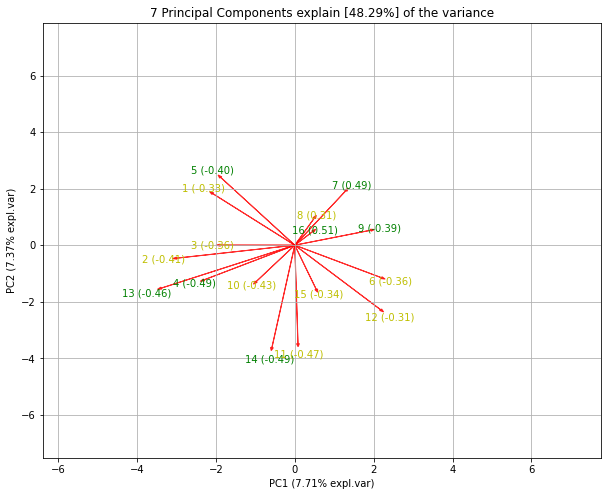

In [413]:
# Correlation PCA
fig, ax = model.biplot(n_feat=16, cmap=None, label=False, legend=False)

In [406]:
model2 = pca(n_components=7)
results2 = model2.fit_transform(df_fct)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [16] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


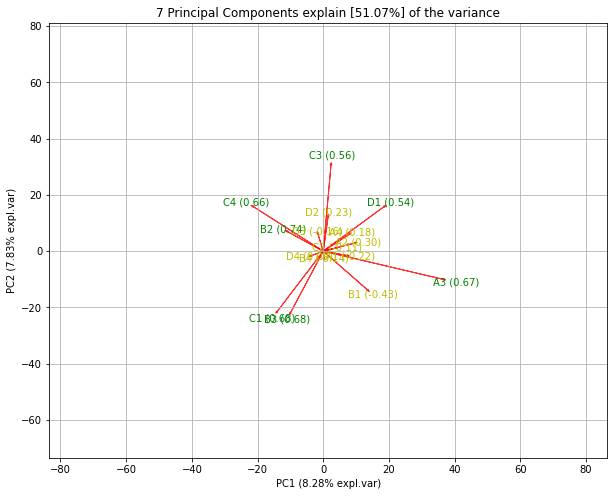

In [412]:
# Covariance PCA
fig, ax = model2.biplot(n_feat=16, cmap=None, label=False, legend=False)

I'm not sure if PCA makes sense here.  We have sparse data, and if we do use PCA, we may need to do correlation PCA because the values vary significantly.  The different variables might have similar distributions though.

## Cluster on Regression Coefficients


1. Cluster using all regression coefficients
1. Add cluster solutions to original dataframe (1s & 0s)
1. Replace 1s in original dataframe with their respective coefficients
1. Of the 3 clustering algorithms, which solution was best for each set of clusters

In [ ]:
sw=[]

for i in range(2,7):
    
    # Create clustering objects
    cls1 = KMeans(n_clusters=i, random_state=0)
    cls2 = KMedoids(n_clusters=i, random_state=0)
    cls3 = AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage ='ward')
        # Note on agglomerative clustering: if linkage is ward, affinity must be Euclidean
    cls_algs = [['kMeans', cls1], ['kMedoids', cls2], ['Hierarchical', cls3]]
    
    # Fit and score clustering solutions for i clusters with each clustering algorithm
    for cls in cls_algs:
        
        # Fit the model to the factor analysis scores
        cls[1].fit(scores)
        
        # List of assigned clusters
        clusters = cls[1].fit_predict(scores)
        
        # Silhouette scores for each solution
        silhouette_avg = silhouette_score(scores,clusters)
        
        # Store solution info [algorithm, number of clusters, avg silhouette score, cluster predictions]
        algorithm = cls[0]
        i_stats = [algorithm, i, silhouette_avg, clusters]
        sw.append(i_stats)
        
        # Add columns of cluster assignments to df_fct datafram
        df_fct[algorithm+'_'+'cluster'+'_'+str(i)] = clusters


# Reorder cluster lists by descending silhouette scores.  Clusters in first element should be assigned to training data.
sw = sorted(sw, key=itemgetter(2), reverse=True)

# Add the labels to the training dataset (you can ignore the warning when the cell runs)
df_fct['cluster'] = sw[0][3]

In [ ]:
# This is for making the letter-based regression dynamic

# Create a list of unique first letters of variables
X = df.drop(['UID','Rating','target'], axis=1)
y = df["target"]

var_letters = []

for i in X.columns:
    var_letters.append(i[0:1])  # Append first character

var_letters = list(np.unique(var_letters))  # List of unique variable letters



<b>Scenario Analysis</b>

In [46]:
df.head()

,UID,A1,A2,A3,A4,B1,B2,B3,B4,C1,C2,C3,C4,D1,D2,D3,D4,Rating,target
0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,100,100.000507
1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,100,100.000668
2,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0.000386
3,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0.000067
4,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0.000382


In [19]:
# np.where(condition, value if condition is true, value if condition is false)

# create a list of the column categories

cat_A = ['A1', 'A2', 'A3', 'A4']
cat_B = ['B1', 'B2', 'B3', 'B4']
cat_C = ['C1', 'C2', 'C3', 'C4']
cat_D = ['D1', 'D2', 'D3', 'D4']

# create a list of our conditions
cat_A_conditions = [
    (df['A1'] == 1),
    (df['A2'] == 1),
    (df['A3'] == 1),
    (df['A4'] == 1),
    (df['A1']==0) & (df['A2']==0) & (df['A3']==0) & (df['A4']==0),
    ]

cat_B_conditions = [    
    (df['B1'] == 1),
    (df['B2'] == 1),
    (df['B3'] == 1),
    (df['B4'] == 1),
    (df['B1']==0) & (df['B2']==0) & (df['B3']==0) & (df['B4']==0),
    ]    

cat_C_conditions = [    
    (df['C1'] == 1),
    (df['C2'] == 1),
    (df['C3'] == 1),
    (df['C4'] == 1),
    (df['C1']==0) & (df['C2']==0) & (df['C3']==0) & (df['C4']==0),
    ]

cat_D_conditions = [    
    (df['D1'] == 1),
    (df['D2'] == 1),
    (df['D3'] == 1),
    (df['D4'] == 1),  
    (df['D1']==0) & (df['D2']==0) & (df['D3']==0) & (df['D4']==0),
    ]

# create a list of the values we want to assign for each condition
cat_A_values = ['A1', 'A2', 'A3', 'A4', 'A0']
cat_B_values = ['B1', 'B2', 'B3', 'B4','B0']
cat_C_values = ['C1', 'C2', 'C3', 'C4','C0']
cat_D_values = ['D1', 'D2', 'D3', 'D4','D0']
    
df['cat_A_scenario'] = np.select(cat_A_conditions, cat_A_values)
df['cat_B_scenario'] = np.select(cat_B_conditions, cat_B_values)
df['cat_C_scenario'] = np.select(cat_C_conditions, cat_C_values)
df['cat_D_scenario'] = np.select(cat_D_conditions, cat_D_values)

<b> Example of Scenario where Variable A1 has a 1 </b>

In [20]:
cat_A = df['cat_A_scenario'].unique()
# list of independant variables for regression
fields = df.columns[1:17]
dep_var = df['noise']

In [21]:
df_A1 = df[df['cat_A_scenario']=='A1']
df_A1

,UID,A1,A2,A3,A4,B1,B2,B3,B4,C1,...,D1,D2,D3,D4,Rating,noise,cat_A_scenario,cat_B_scenario,cat_C_scenario,cat_D_scenario
0,1,1,0,0,0,0,0,0,1,1,...,0,0,0,0,100,100.000893,A1,B4,C1,D0
1,1,1,0,0,0,0,0,1,0,0,...,1,0,0,0,100,100.000783,A1,B3,C0,D1
13,1,1,0,0,0,0,0,0,0,1,...,0,0,0,1,100,100.000825,A1,B0,C1,D4
16,1,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0.000479,A1,B4,C4,D3
17,1,1,0,0,0,1,0,0,0,0,...,0,0,0,1,100,100.000252,A1,B1,C3,D4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383,100,1,0,0,0,0,0,0,1,0,...,0,0,0,1,5,5.000552,A1,B4,C0,D4
2385,100,1,0,0,0,0,0,1,0,0,...,0,0,1,0,5,5.000693,A1,B3,C2,D3
2393,100,1,0,0,0,0,0,0,1,0,...,0,1,0,0,5,5.000722,A1,B4,C4,D2
2398,100,1,0,0,0,1,0,0,0,0,...,0,0,0,0,5,5.000264,A1,B1,C4,D0


In [24]:
X =df_A1[['B1', 'B2', 'B3', 'B4','C1', 'C2', 'C3', 'C4','D1', 'D2', 'D3', 'D4']]
y= df_A1['noise']
reg = LinearRegression().fit(X, y)
reg.score(X, y)
const = reg.intercept_
coef = reg.coef_
print(const)
print(coef)

33.91035518762444
[ -3.84235504 -13.45891789  -5.98115784  -1.00151876  -5.2084735
  -0.95495595  -3.15645822  -7.2888877   -2.32297686  -3.7339574
  -5.08132817   1.23153583]


In [23]:
# scratch pad, not finished
for i in cat_A:
    df_i = df[df.cat_A_scenario == i]
    X =df_i[df_i.columns[1:17]]
    y= df_i['noise']
    reg = LinearRegression().fit(X, y)
    reg.score(X, y)
    const = reg.intercept_
    coef = reg.coef_
    intercept.append(const)
    coefficients.append(coef)
#print(UID)    
intercep_new = pd.DataFrame(intercept)
coefficients_new = pd.DataFrame(coefficients)